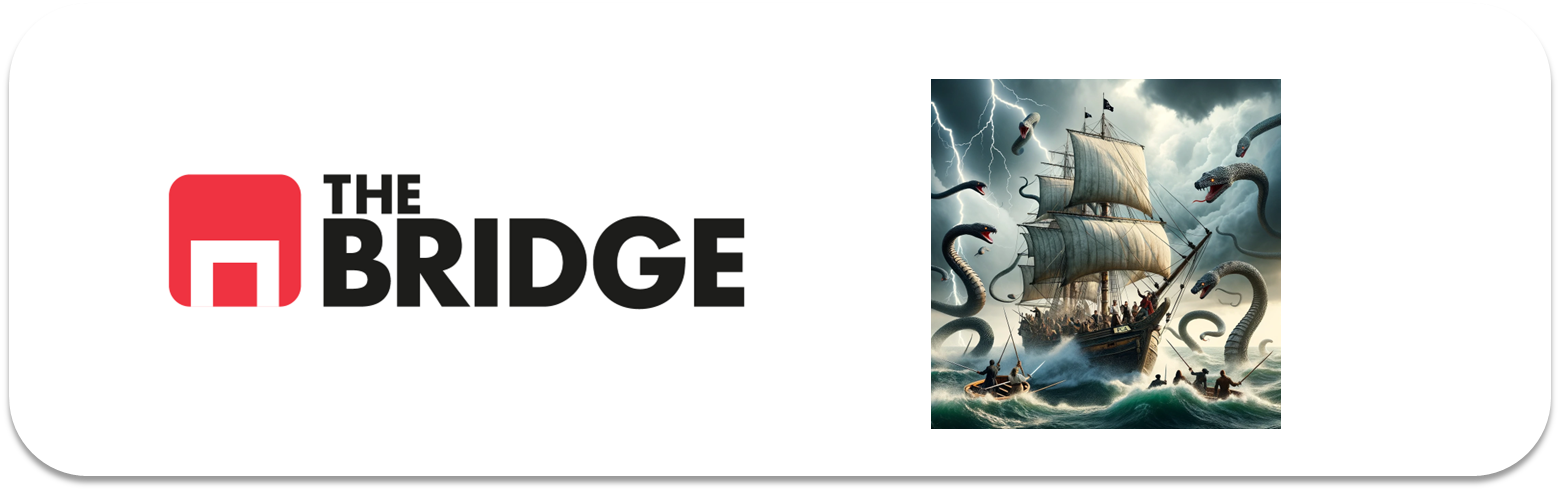

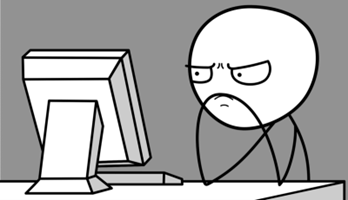

Para ejercitarte y afianzar lo aprendido sobre **Seleccion de Features**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

## Feature selection: Breast Cancer Winsconsin

El objetivo de este grupo de ejercicio es dar a entender la importancia de la selección de características (features), así como probar distintos métodos de reducción de características (features) y qué influencia puede tener el reducir features en el perfomance de un modelo. Nuestro target para evaluar el perfomance será si estamos ante tumores malignos o benignos.

Vamos a trabajar con el dataset de Breast Cancer Winsconsin, datos tomados a partir de radiografías.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import bootcampviztools as bt

### Ejercicio 1:

Carga los datos y haz una primera inspección de los mismos y comenta lo que creas conveniente sobre las features y su relación entre sí (pero sin analizarlas numéricamente)

In [21]:
data = pd.read_csv('./data/breastcancer-winsconsin.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [22]:
data.diagnosis.value_counts(normalize=True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'radius_se'}>],
       [<Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>],
       [<Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'center': 's

<Figure size 2000x2000 with 0 Axes>

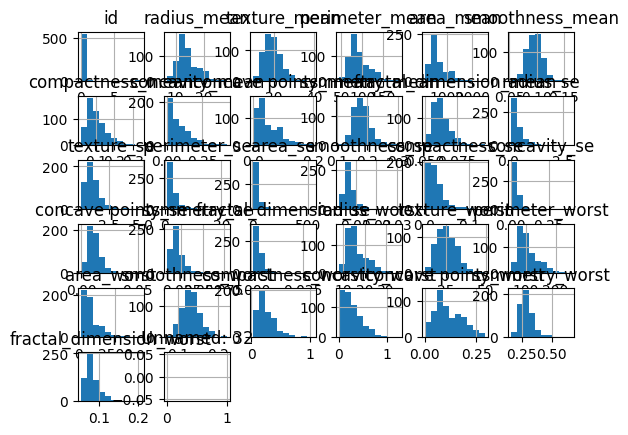

In [13]:
plt.figure(figsize=(20,20))
data.hist()
# plt.tight_layout()

### Ejercicio 2:

Descarta las características que evidentemente no aportan información.

In [26]:
data.drop(columns=['Unnamed: 32','id'],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Ejercicio 3: 

Divide en train y test. Analiza el target de forma breve.

In [29]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(data, test_size=0.2, random_state=42)

train

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,B,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,...,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,M,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,...,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,B,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,B,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,...,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,B,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,...,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,B,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,B,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,B,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,M,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


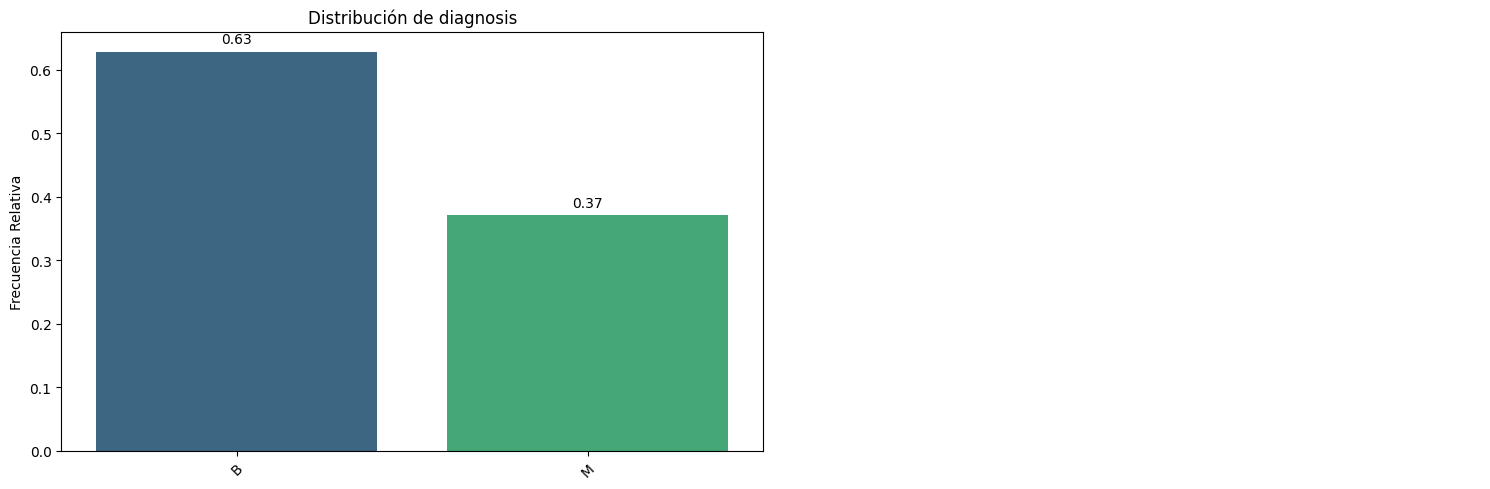

In [30]:
bt.pinta_distribucion_categoricas(train,['diagnosis'],relativa=True,mostrar_valores=True)


### Ejercicio 4: MiniEDA (I) Análisis Visual

Realiza un análisis visual de las features y haz tu selección de primera "división" (que luego usaremos para comparar con otros métodos de selección).

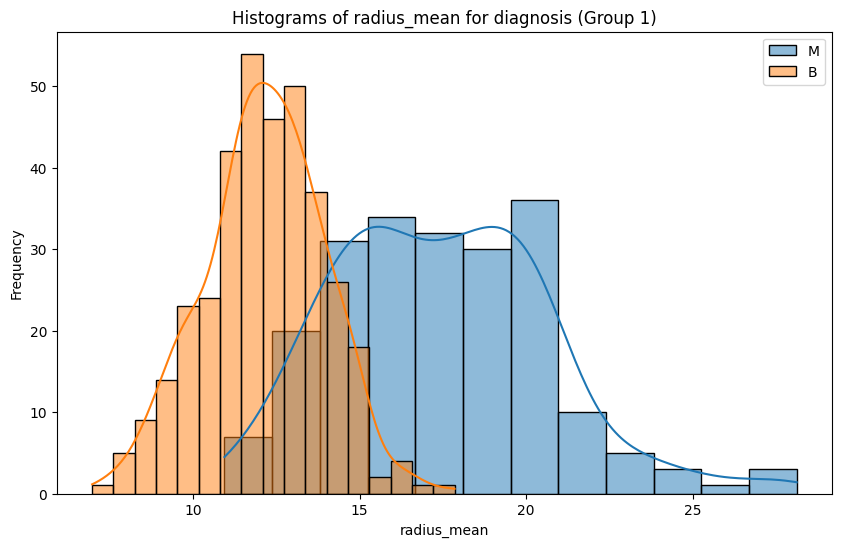

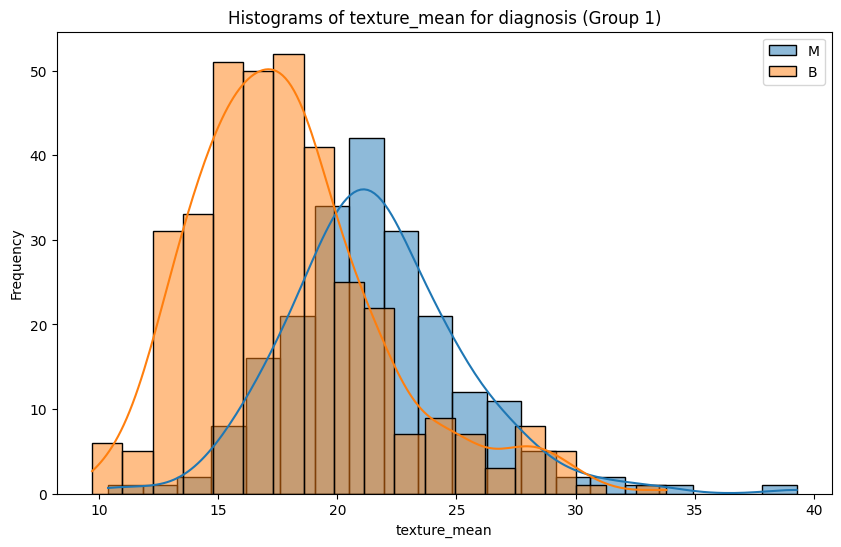

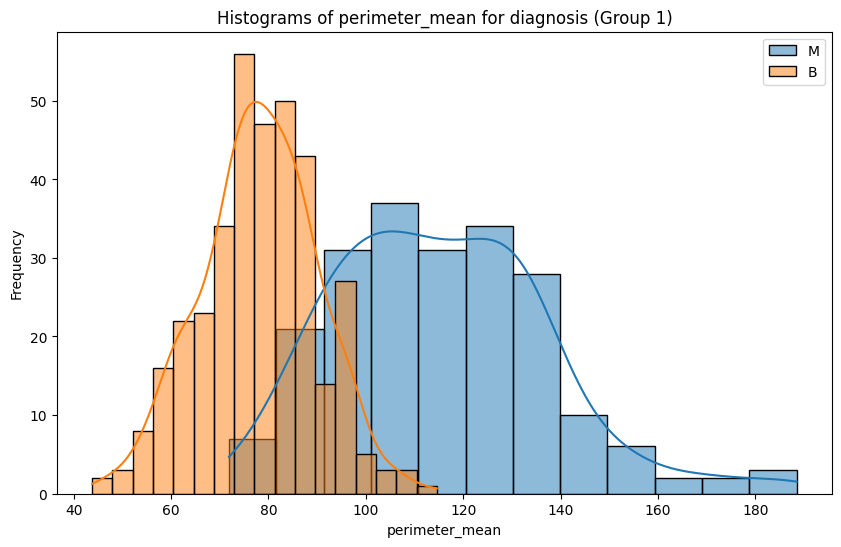

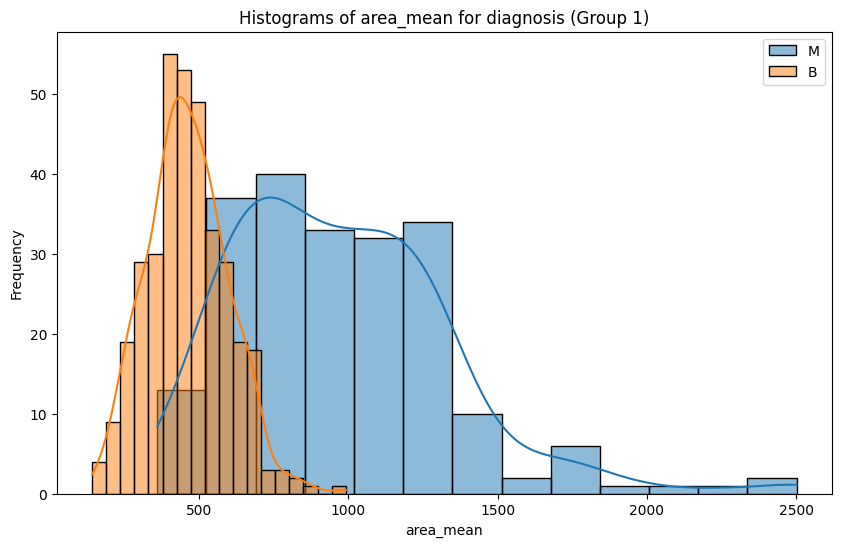

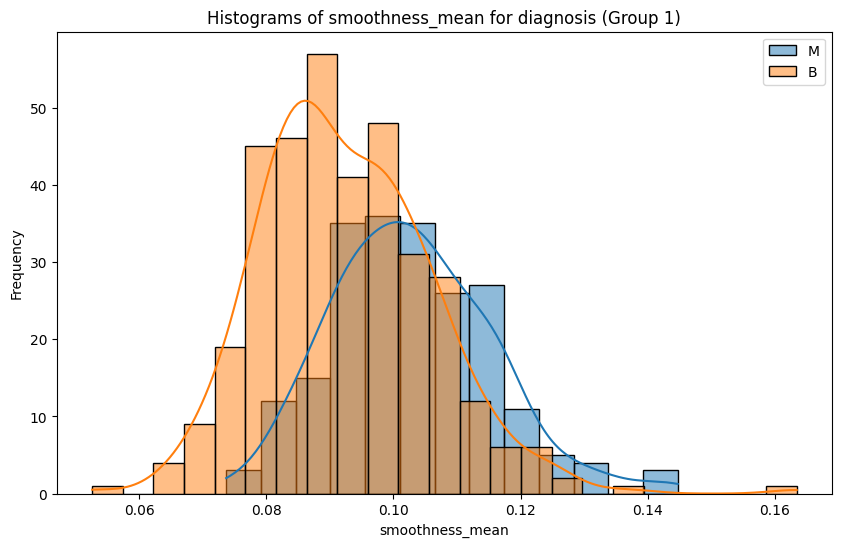

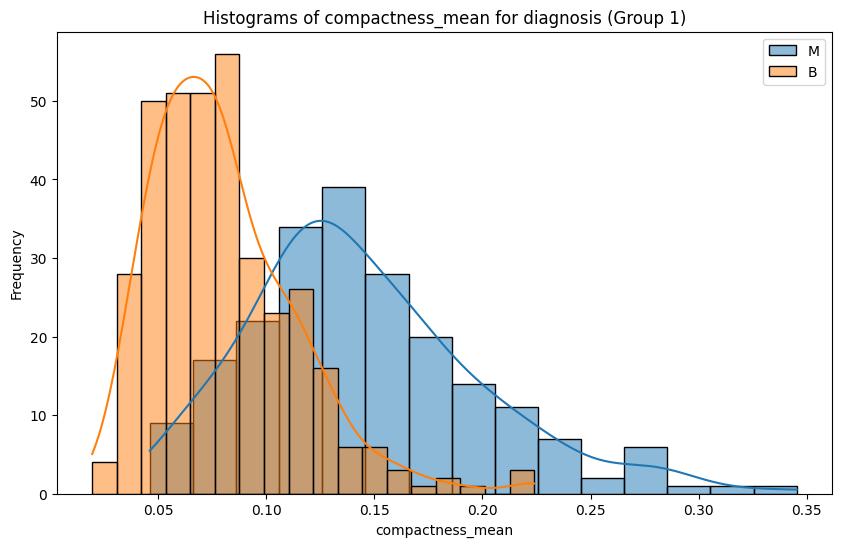

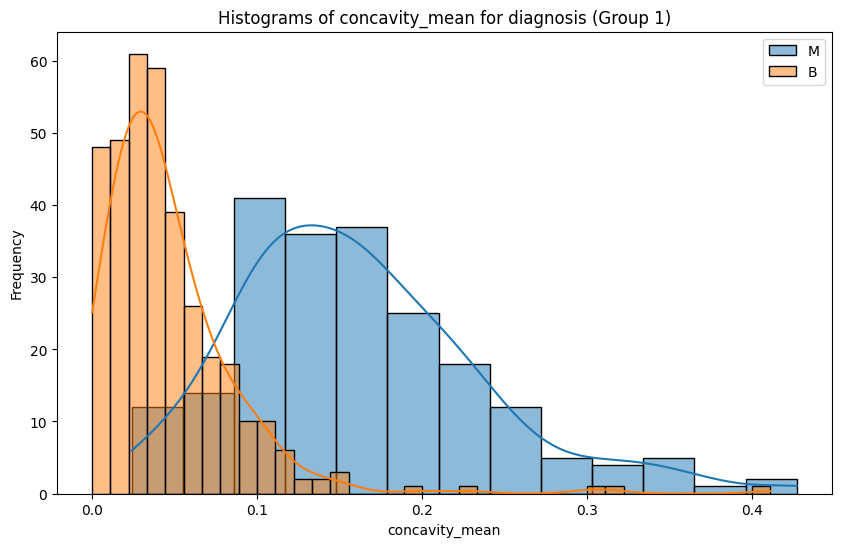

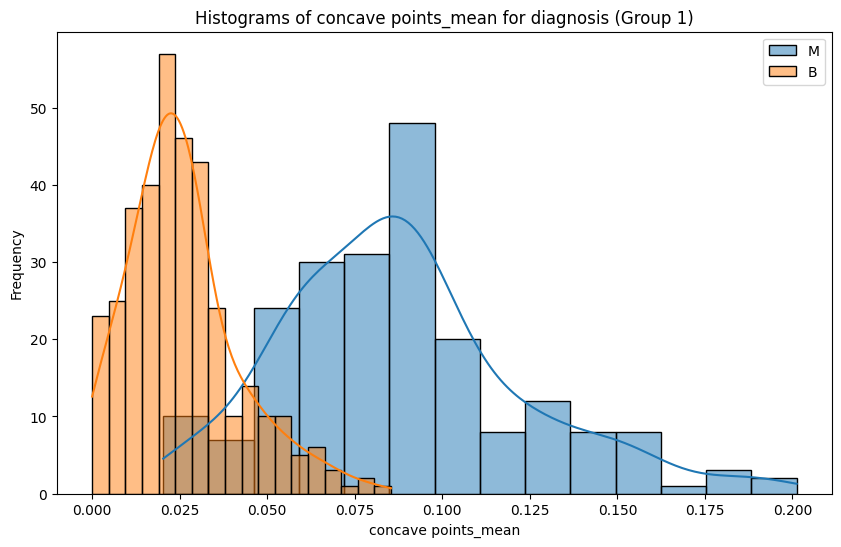

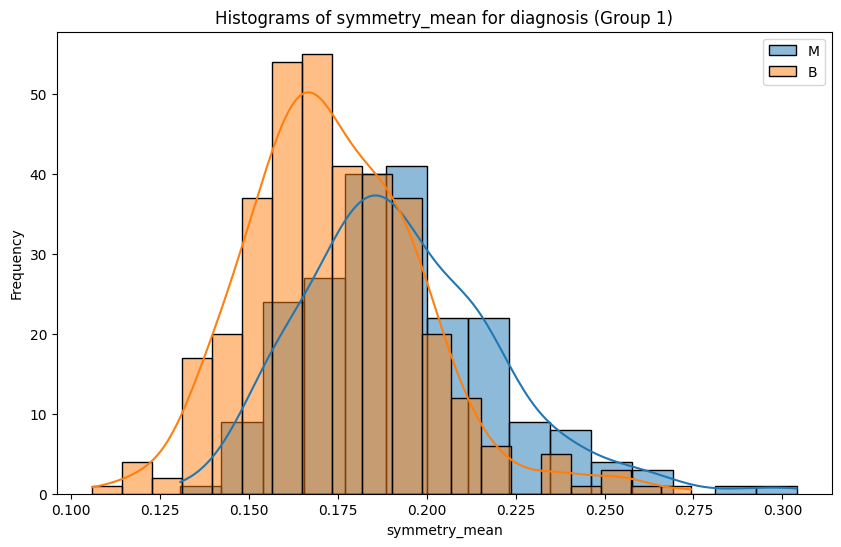

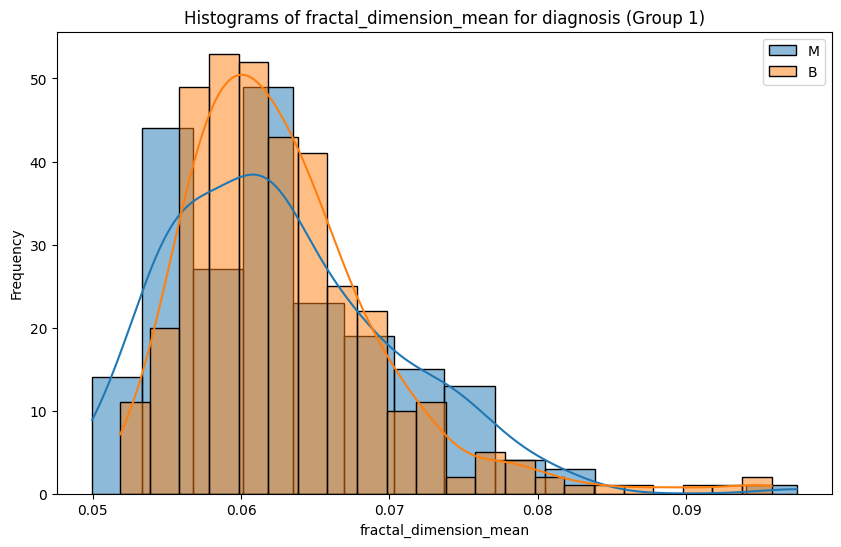

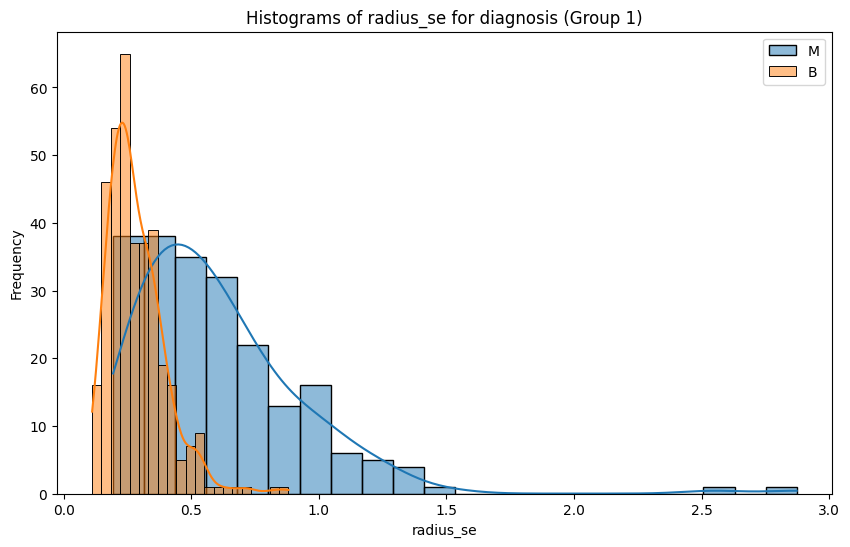

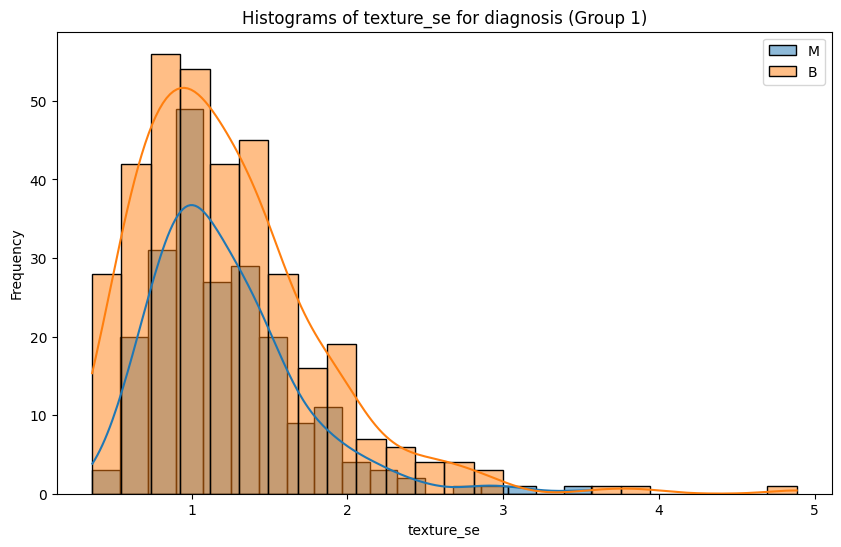

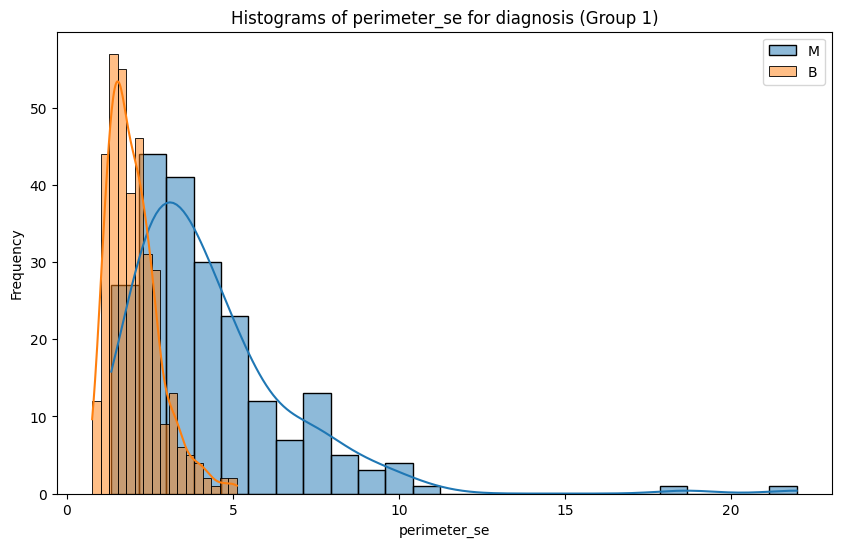

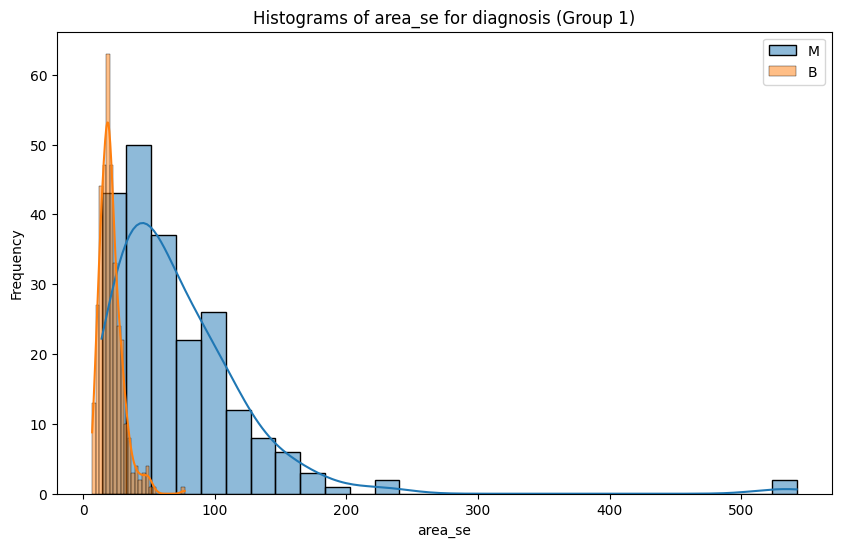

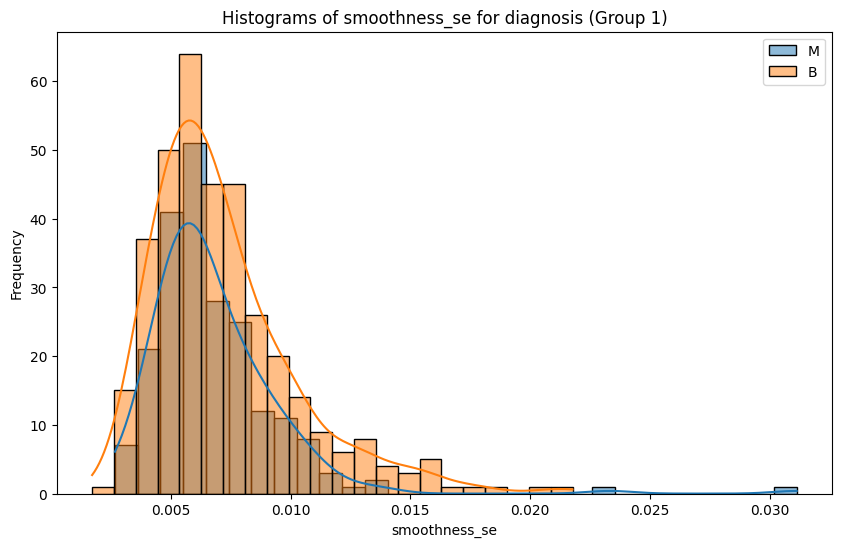

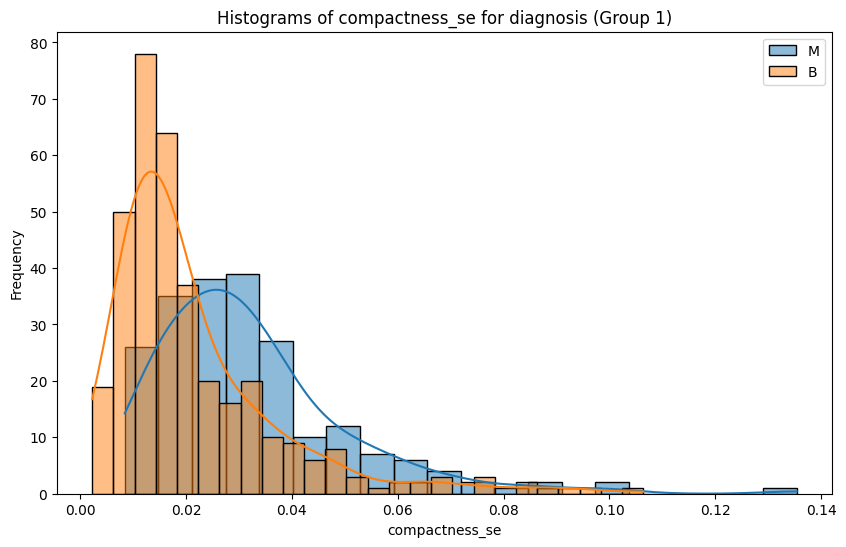

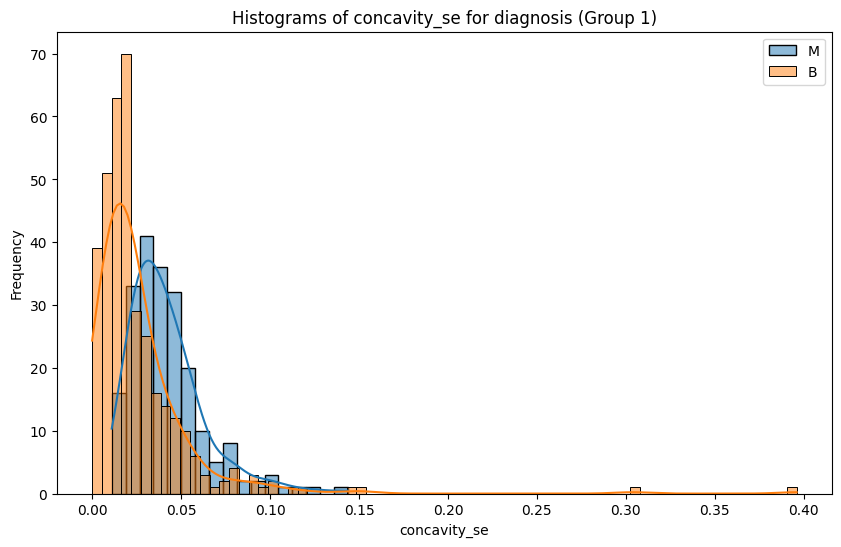

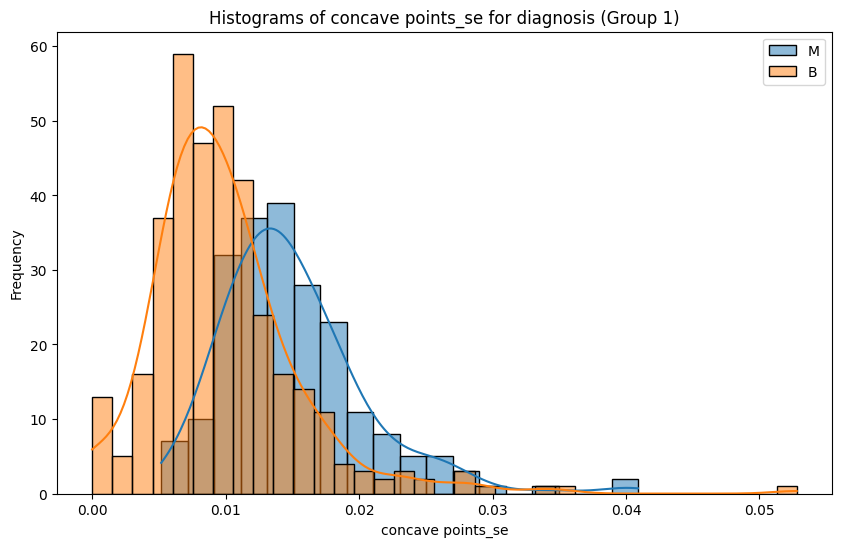

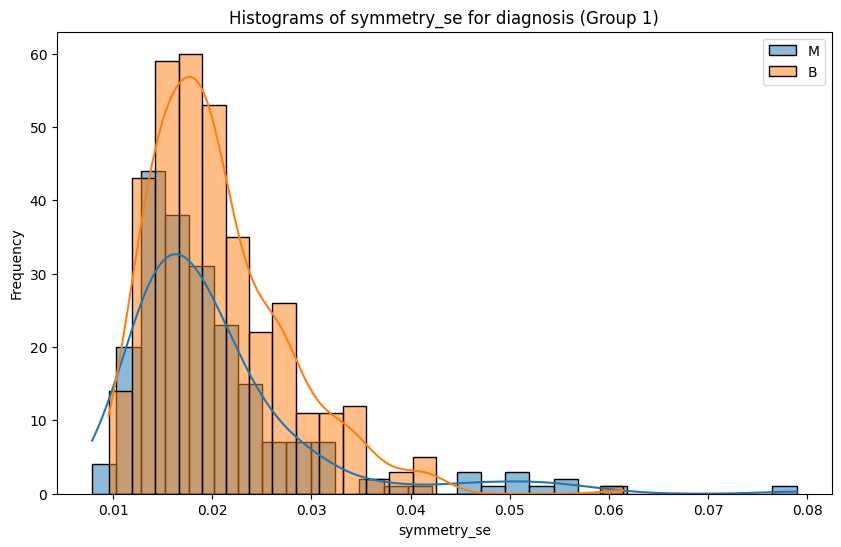

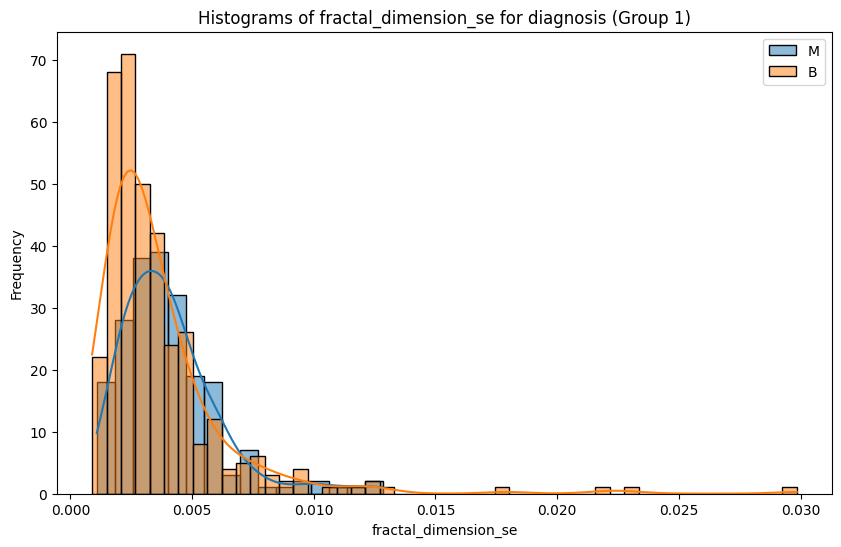

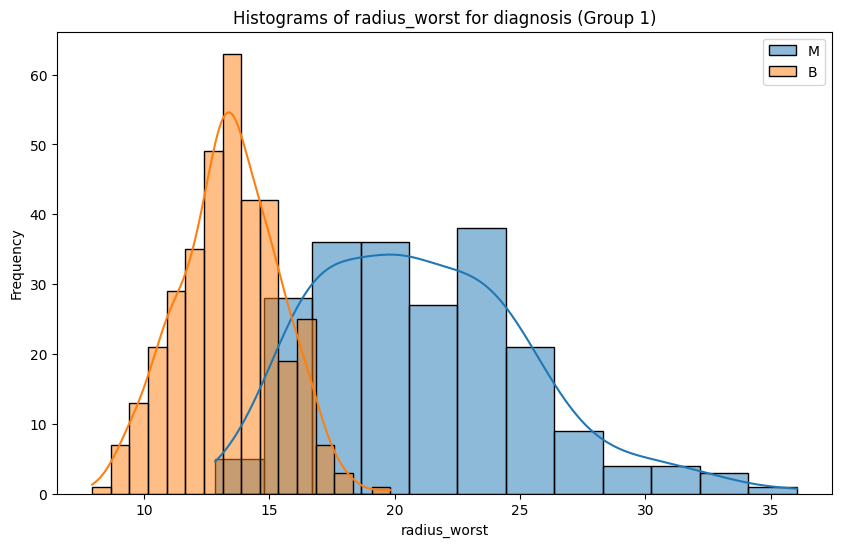

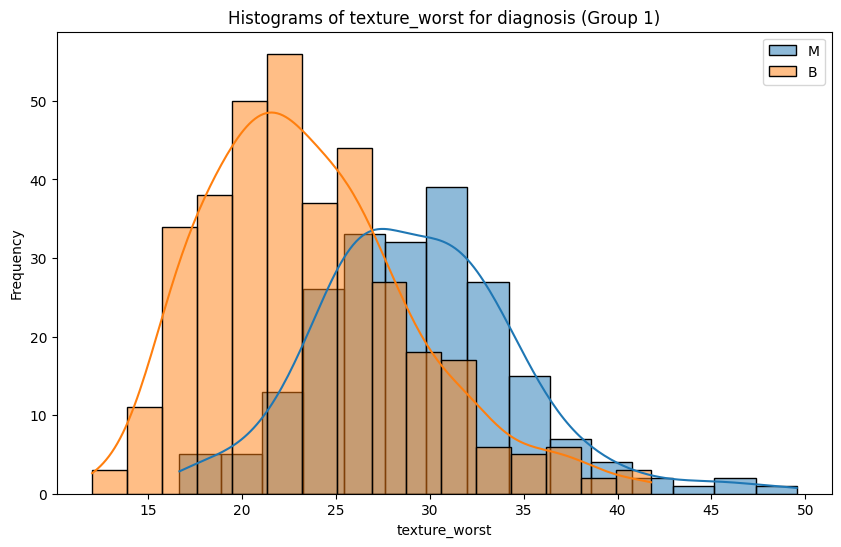

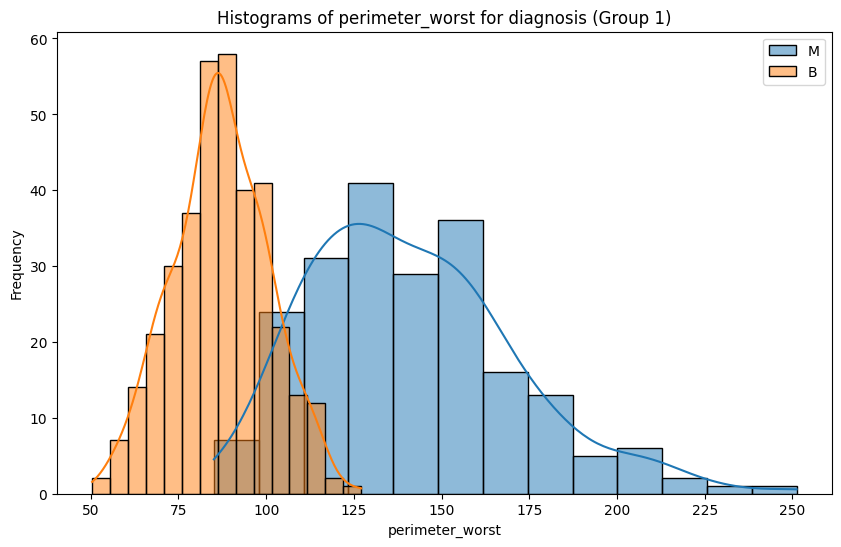

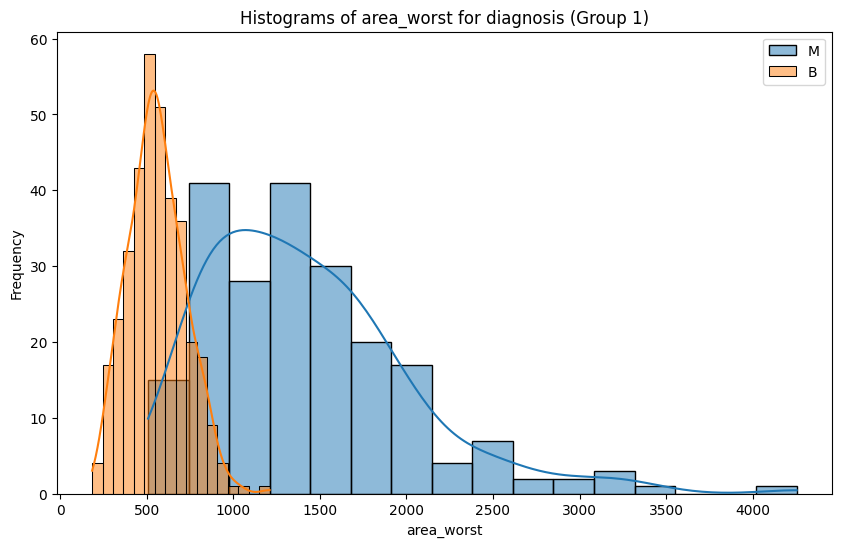

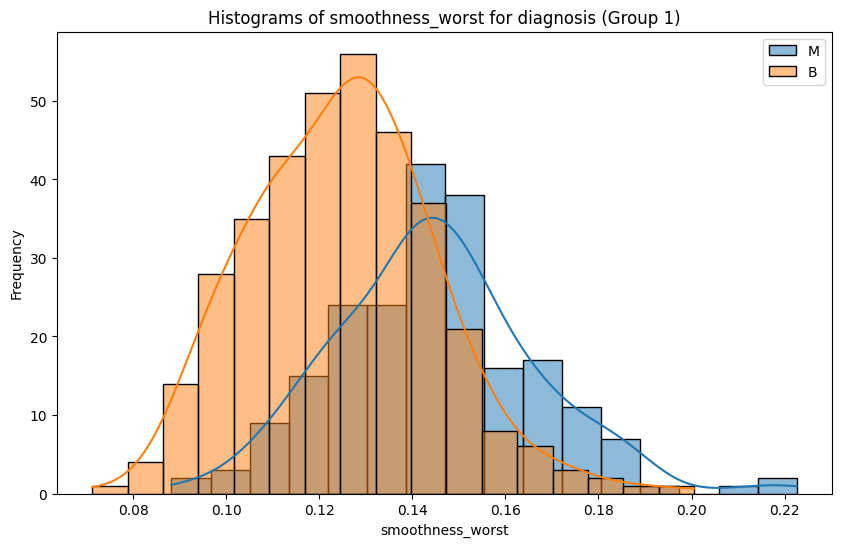

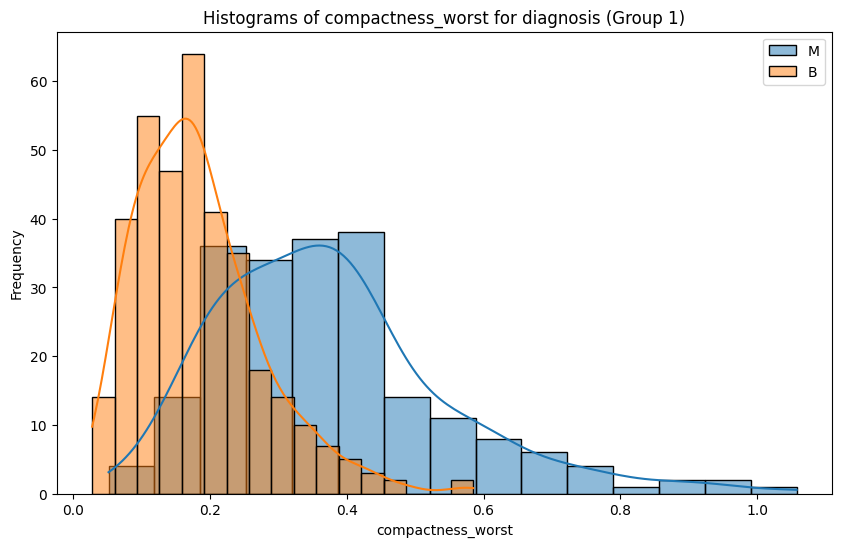

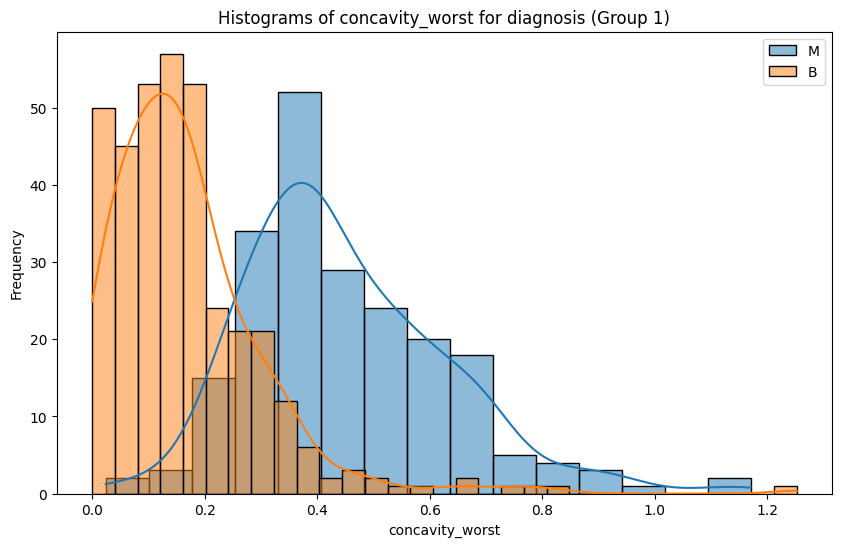

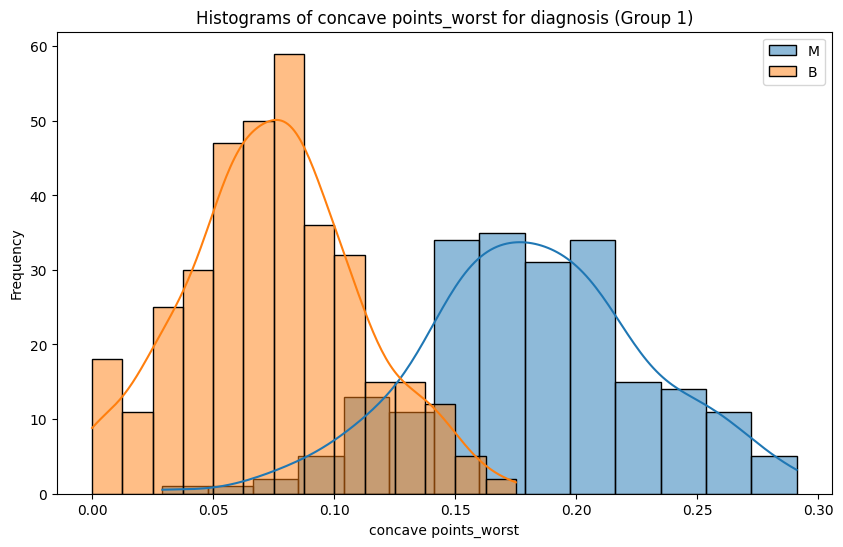

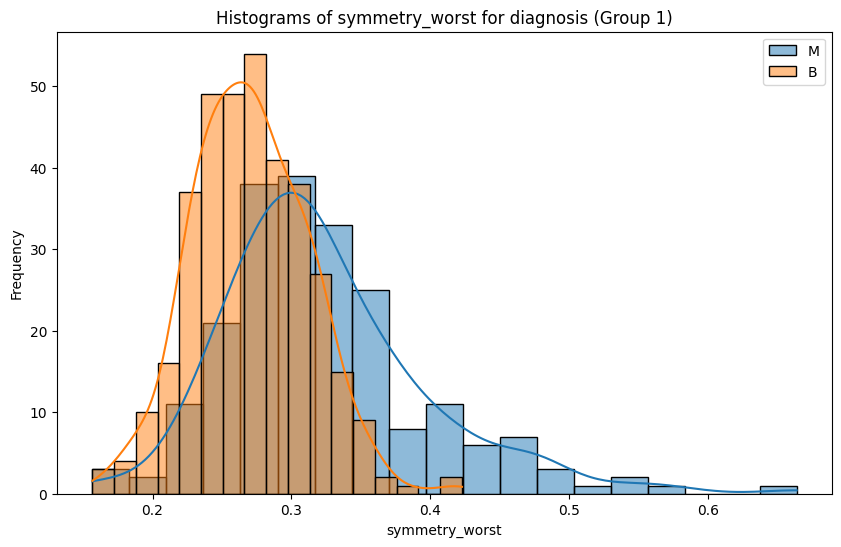

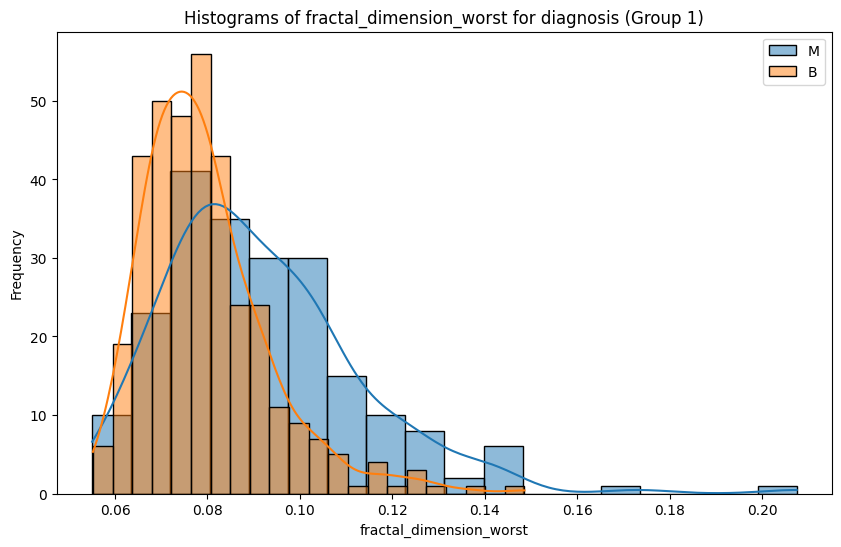

In [58]:
target = 'diagnosis'
features_num_all = [col for col in data.columns if col != target]

for feature in features_num_all:
    bt.plot_grouped_histograms(data, cat_col=target, num_col=feature, group_size=data[target].nunique())


In [59]:
features_num_all

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [64]:
feautures_num = ['radius_mean','texture_mean','perimeter_mean','area_mean','concavity_mean','concave points_mean','radius_worst','perimeter_worst','concavity_worst','concave points_worst']
feautures_num_2 = ['texture_mean','compactness_mean','radius_se','perimeter_se','area_se','compactness_se','area_worst','compactness_worst',]

### Ejercicio 5

Observa correlaciones entre las features. Utiliza un gráfico apropiado para ello. ¿Crees que sea posible eliminar algunas features para mejorar el modelo? (No hace falta que lo hagas ahora, lo haremos si es necesario en un ejercicio posterior)

<Axes: >

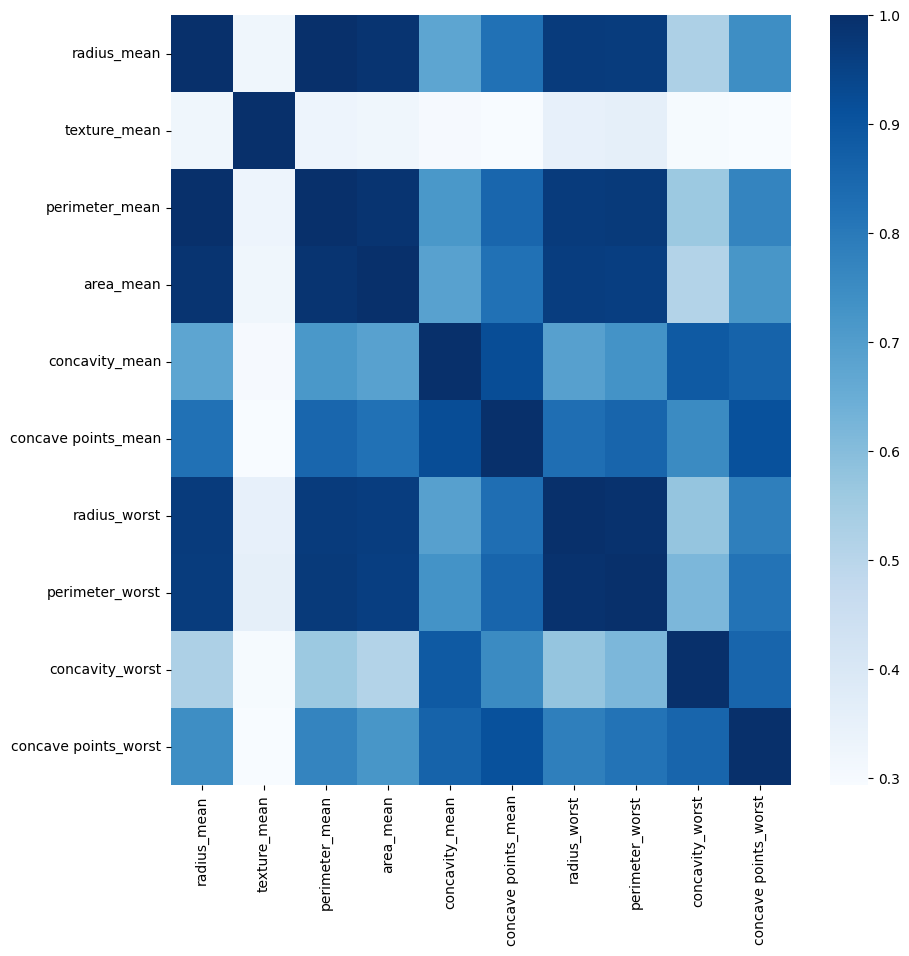

In [61]:
corr= data[feautures_num].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr[feautures_num], annot= False, cmap= "Blues")

<Axes: >

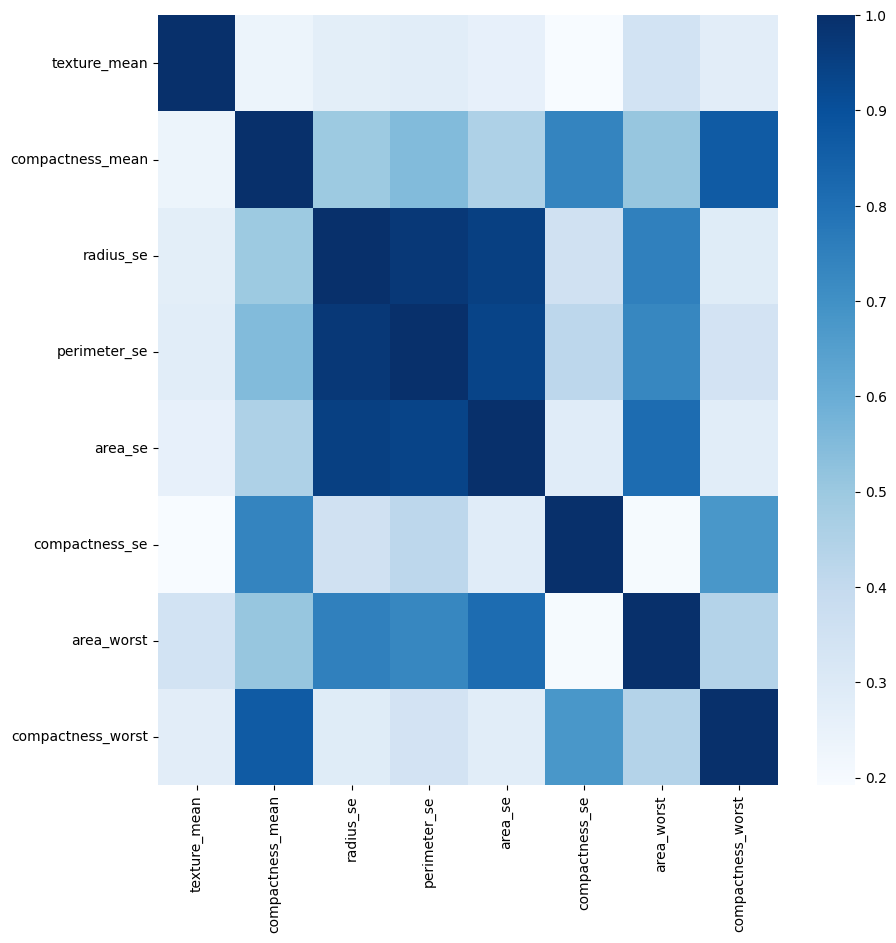

In [62]:
corr= data[feautures_num_2].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr[feautures_num_2], annot= False, cmap= "Blues")

### Ejercicio 6:

Entrena (con validación cruzada) un modelo de RandomForestClassifier (con max_depth a 5) con todas las features (ojo incluso las que descartamos en el ejercicio 4) y guarda el perfomance ("balanced_accuracy") en test en una variable. Será nuestro base line de comparación

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score

y_train = train[target]
X_train = train[features_num_all]

y_test = test[target]
X_test = test[features_num_all]

rf_baseline = RandomForestClassifier(max_depth=5, random_state=42)
cv_scores = cross_val_score(rf_baseline, X_train, y_train, cv=5, scoring='balanced_accuracy')

# Entrenar en el conjunto de entrenamiento completo
rf_baseline.fit(X_train, y_train)

# Evaluación en test
y_pred = rf_baseline.predict(X_test)
test_score = balanced_accuracy_score(y_test, y_pred)

# Mostrar resultados
print(f"CV Balanced Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
print(f"Test Balanced Accuracy: {test_score:.4f}")


CV Balanced Accuracy: 0.9539 ± 0.0163
Test Balanced Accuracy: 0.9581


### Ejercicio 7

Vamos a emplear nuestras features del análisis visual pero descartando variables correladas entre sí (emplea la matriz ya obtenida en el ejercicio 5 o bien cualquier medio que creas conveniente). Descarta features y muestra la matriz de correlación para la selección final (recuerda, parte de la lista creada en el ejercicio 4)

In [80]:
corr_matrix = data[features_num].corr().abs()

# Identificar las características con correlación mayor a 0.7
upper_triangle = np.triu(np.ones(corr_matrix.shape), k=1)  # Triangular superior para evitar duplicados
high_corr_pairs = (corr_matrix > 0.85) & (upper_triangle == 1)

# Lista de columnas a eliminar (solo una de cada par correlado)
to_drop = set()
for col in high_corr_pairs.columns:
    if any(high_corr_pairs[col]):
        to_drop.add(col)

# Filtrar características
filtered_features = [col for col in features_num if col not in to_drop]

print(f"Características eliminadas: {to_drop}")
print(f"Características finales: {filtered_features}")

Características eliminadas: {'radius_worst', 'area_se', 'concavity_worst', 'concave points_worst', 'perimeter_mean', 'compactness_worst', 'concave points_mean', 'texture_worst', 'area_worst', 'perimeter_worst', 'concavity_mean', 'area_mean', 'perimeter_se'}
Características finales: ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst']


### Ejercicio 8

Evalúa tu primer feature reduction. Entrena un modelo y evalúa su perfomance con los features que seleccionaste en el ejercicio anterios (emplea la validación cruzada)

In [81]:
X_train_filtered = X_train[filtered_features]
X_test_filtered = X_test[filtered_features]


In [85]:
rf_2 = RandomForestClassifier(max_depth=5, random_state=42)
cv_scores = cross_val_score(rf_2, X_train_filtered, y_train, cv=5, scoring='balanced_accuracy')

# Entrenar en el conjunto de entrenamiento completo
rf_2.fit(X_train_filtered, y_train)

# Evaluación en test
y_pred = rf_2.predict(X_test_filtered)
test_score = balanced_accuracy_score(y_test, y_pred)

# Mostrar resultados
print(f"CV Balanced Accuracy rf_2: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
print(f"Test Balanced Accuracy rf_2: {test_score:.4f}")


CV Balanced Accuracy rf_2: 0.9304 ± 0.0198
Test Balanced Accuracy rf_2: 0.9510


### Ejercicio 9

Prueba ahora a hacer una feature selection utilizando ANOVA. Compara la validación cruzada con la del modelo baseline y con la del modelo anterior. (Pista: SelectKbest)

In [88]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=5)
x_data_kbest = selector.fit_transform(X_train, y_train)
X_train_kbest = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())
X_test_kbest = pd.DataFrame(X_test, columns = selector.get_feature_names_out())
X_train_kbest
X_test_kbest


,perimeter_mean,concave points_mean,radius_worst,perimeter_worst,concave points_worst
204,81.09,0.03821,14.97,96.05,0.10150
70,123.60,0.07951,24.86,165.90,0.17890
131,101.70,0.08087,19.26,124.90,0.15140
431,81.47,0.02799,12.88,89.61,0.07370
540,74.65,0.02594,12.26,78.78,0.06918
...,...,...,...,...,...
486,94.21,0.02791,16.46,106.00,0.07828
75,104.10,0.06638,19.77,128.80,0.15200
249,73.87,0.02929,12.65,80.88,0.09608
238,92.55,0.04408,15.75,102.50,0.08219


In [89]:
rf_3 = RandomForestClassifier(max_depth=5, random_state=42)
cv_scores = cross_val_score(rf_3, X_train_kbest, y_train, cv=5, scoring='balanced_accuracy')

# Entrenar en el conjunto de entrenamiento completo
rf_3.fit(X_train_kbest, y_train)

# Evaluación en test
y_pred = rf_3.predict(X_test_kbest)
test_score = balanced_accuracy_score(y_test, y_pred)

# Mostrar resultados
print(f"CV Balanced Accuracy rf_3: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
print(f"Test Balanced Accuracy rf_3: {test_score:.4f}")

CV Balanced Accuracy rf_3: 0.9299 ± 0.0205
Test Balanced Accuracy rf_3: 0.9510


### Ejercicio 10

Prueba a hacer ahora una selección de features con RFE (Recursive Feature Elimination), hasta quedarte con 5 features. Evalúa perfomance en "balanced_accuracy" con cross_validation y compara con la baseline.

In [92]:
from sklearn.feature_selection import RFE

rf_RFE = RandomForestClassifier(random_state= 42) # Puedes usar tu modelo, o modelos a probar o un modelo "proxy" como en la selección por modelo

rfe = RFE(estimator = rf_RFE,n_features_to_select= 5, # Iterará hasta quedarse con 5
step = 1) # Elimina de una en una, pero es configurable

rfe.fit(X_train, y_train)
print(rfe.ranking_)
features_ranking= pd.DataFrame(rfe.ranking_, columns= ["ranking"], index = features_num_all).sort_values("ranking")
features_ranking

[ 7  6  3  8 15 16  2  1 24 21 14 25 12 13 22 23 19 26 20 17  1  4  1  1
  9 10  5  1 11 18]


,ranking
radius_worst,1
perimeter_worst,1
area_worst,1
concave points_mean,1
concave points_worst,1
concavity_mean,2
perimeter_mean,3
texture_worst,4
concavity_worst,5
texture_mean,6


In [94]:
features_ranking['ranking'] == 1
features_select = features_ranking.loc[features_ranking['ranking'] == 1].index.tolist()
features_select

['radius_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_mean',
 'concave points_worst']

In [95]:
X_train_select = X_train[features_select]
X_test_select = X_test[features_select]

In [96]:
rf_4 = RandomForestClassifier(max_depth=5, random_state=42)
cv_scores = cross_val_score(rf_4, X_train_select, y_train, cv=5, scoring='balanced_accuracy')

# Entrenar en el conjunto de entrenamiento completo
rf_4.fit(X_train_select, y_train)

# Evaluación en test
y_pred = rf_4.predict(X_test_select)
test_score = balanced_accuracy_score(y_test, y_pred)

# Mostrar resultados
print(f"CV Balanced Accuracy rf_4: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
print(f"Test Balanced Accuracy rf_4: {test_score:.4f}")

CV Balanced Accuracy rf_4: 0.9316 ± 0.0207
Test Balanced Accuracy rf_4: 0.9510


### Ejercicio 11

Prueba a eliminar features con el modelo de RandomForestClassifier (emplea SelectFromModel de sklearn). Utiliza esta vez una regresión logística para entrenar con las features escogidas y compara con el baseline. Muestra primero la importancia obtenida con el modelo baseline (que básicamente es el mismo que vamos a usar con SelectFromModel). Prueba primero para features por encima de la mediana y luego para las 5 primeras.

In [97]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

# Modelo baseline: RandomForestClassifier
rf_baseline = RandomForestClassifier(max_depth=5, random_state=42)
rf_baseline.fit(X_train, y_train)

# Obtener importancia de características
feature_importances = pd.DataFrame({
    'feature': features_num_all,
    'importance': rf_baseline.feature_importances_
}).sort_values(by='importance', ascending=False)

print("### Importancia de características (Baseline - RandomForest) ###")
print(feature_importances)

### Importancia de características (Baseline - RandomForest) ###
                    feature  importance
23               area_worst    0.154737
27     concave points_worst    0.153030
7       concave points_mean    0.105276
20             radius_worst    0.075895
22          perimeter_worst    0.069279
6            concavity_mean    0.068214
2            perimeter_mean    0.057780
0               radius_mean    0.052071
3                 area_mean    0.048886
26          concavity_worst    0.030570
10                radius_se    0.022150
13                  area_se    0.020974
25        compactness_worst    0.019071
21            texture_worst    0.018127
5          compactness_mean    0.013331
1              texture_mean    0.013149
24         smoothness_worst    0.010391
12             perimeter_se    0.009725
28           symmetry_worst    0.007947
16             concavity_se    0.006454
29  fractal_dimension_worst    0.005827
4           smoothness_mean    0.005733
19     fractal_

In [99]:
# Seleccionar features con importancia mayor a la mediana
median_importance = feature_importances['importance'].median()
selected_features_median = feature_importances[feature_importances['importance'] > median_importance]['feature'].tolist()
selected_features_median

['area_worst',
 'concave points_worst',
 'concave points_mean',
 'radius_worst',
 'perimeter_worst',
 'concavity_mean',
 'perimeter_mean',
 'radius_mean',
 'area_mean',
 'concavity_worst',
 'radius_se',
 'area_se',
 'compactness_worst',
 'texture_worst',
 'compactness_mean']

In [100]:
# Seleccionar solo las 5 características más importantes
top_5_features = feature_importances.head(5)['feature'].tolist()
top_5_features


['area_worst',
 'concave points_worst',
 'concave points_mean',
 'radius_worst',
 'perimeter_worst']

In [102]:
# Función para entrenar y evaluar regresión logística
def train_logistic_regression(selected_features):
    X_train_sel = X_train[selected_features]
    X_test_sel = X_test[selected_features]

    model_lr = LogisticRegression(max_iter=10000, random_state=42)
    model_lr.fit(X_train_sel, y_train)

    y_pred = model_lr.predict(X_test_sel)
    test_score = balanced_accuracy_score(y_test, y_pred)
    
    return test_score

# Evaluar modelos con las features seleccionadas
score_median = train_logistic_regression(selected_features_median)
score_top5 = train_logistic_regression(top_5_features)
score_baseline = balanced_accuracy_score(y_test, rf_baseline.predict(X_test))  # Score del baseline RandomForest

# Mostrar resultados
print("\n### Comparación de modelos ###")
print(f"Balanced Accuracy (Baseline - RandomForest): {score_baseline:.4f}")
print(f"Balanced Accuracy (Regresión Logística con features > mediana): {score_median:.4f}")
print(f"Balanced Accuracy (Regresión Logística con top 5 features): {score_top5:.4f}")



### Comparación de modelos ###
Balanced Accuracy (Baseline - RandomForest): 0.9581
Balanced Accuracy (Regresión Logística con features > mediana): 0.9581
Balanced Accuracy (Regresión Logística con top 5 features): 0.9419


### Ejercicio EXTRA:

Investiga RFECV y obten el número optimo de features siguiendo esta técnica pero con el "balanced_accuracy" como métrica.

In [105]:
from sklearn.feature_selection import RFECV

# Modelo base para RFECV
rf = RandomForestClassifier(random_state=42)

# Aplicar RFECV con balanced_accuracy como métrica
rfecv = RFECV(
    estimator=rf,
    step=1,
    cv=5,
    scoring='balanced_accuracy',
    n_jobs=-1
)

# Ajustar RFECV
rfecv.fit(X_train, y_train)

# Número óptimo de características
optimal_features = rfecv.n_features_
print(f"Número óptimo de características: {optimal_features}")

# Características seleccionadas
selected_features = [features_num_all[i] for i in range(len(features_num_all)) if rfecv.support_[i]]
print(f"Características seleccionadas: {selected_features}")

Número óptimo de características: 12
Características seleccionadas: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst']


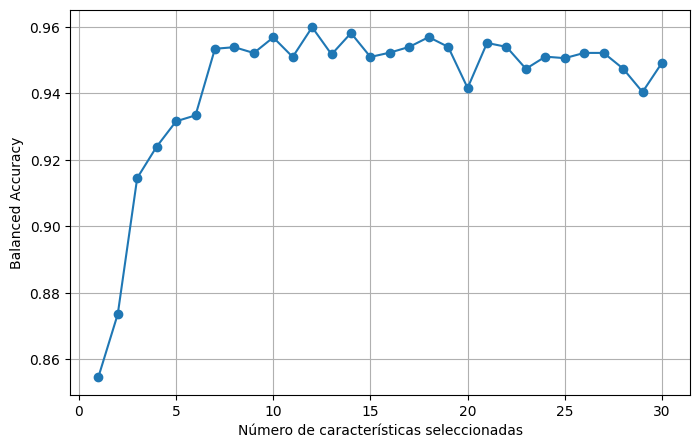

Balanced Accuracy en el conjunto de prueba: 0.9581


In [107]:
# Gráfico de validación cruzada (usando `cv_results_`)
plt.figure(figsize=(8, 5))
plt.xlabel("Número de características seleccionadas")
plt.ylabel("Balanced Accuracy")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker='o')
plt.grid()
plt.show()

# Entrenar modelo de regresión logística con las características seleccionadas
logreg = LogisticRegression(max_iter=10000, random_state=42)
logreg.fit(X_train[selected_features], y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = logreg.predict(X_test[selected_features])
test_score = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy en el conjunto de prueba: {test_score:.4f}")